##### Dataset House prices

A base de dados dá informações sobre casas como: tamanho do lote e formato, se a rua é pavimentada ou não, presença de piscina, cercas, entre outros atributos, além do preço

    - Aqui foram realizadas algumas análises a ponto de verificar quais fatores influenciam nos valores das casas, como presença de ar condicionado central.

Link para o dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd

In [2]:
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500


In [3]:
treino.shape

(1460, 81)

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#verificando quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     44
int64      34
float64     3
dtype: int64

In [6]:
#verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

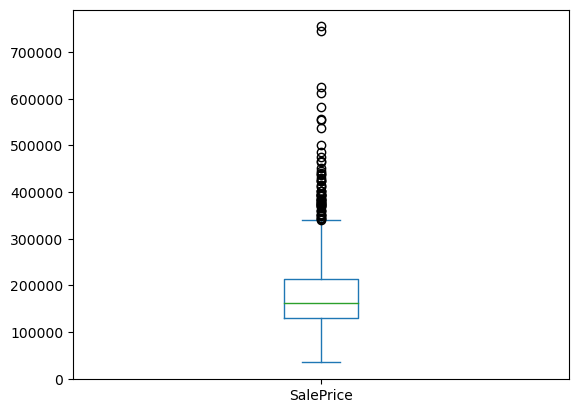

In [7]:
treino.SalePrice.plot.box();

In [8]:
#avaliando a correlação entre os valores
treino.corr()['SalePrice'].sort_values()

C:\Users\carol\AppData\Local\Temp\ipykernel_13240\848678501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  treino.corr()['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.473461
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

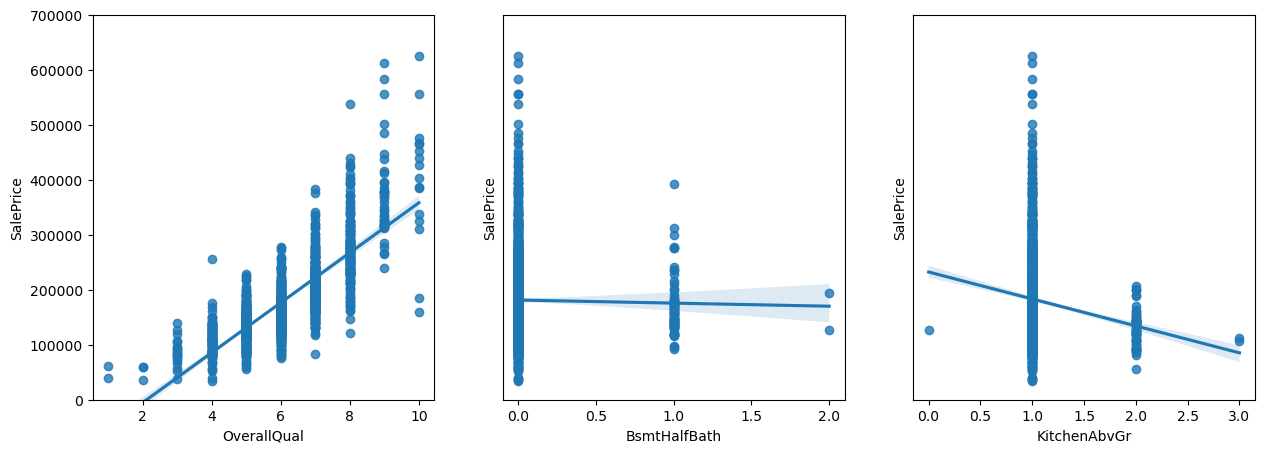

In [9]:
# visualizando graficamente
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(data=treino,x='OverallQual',y='SalePrice',ax=ax[0])
sns.regplot(data=treino,x='BsmtHalfBath',y='SalePrice',ax=ax[1])
sns.regplot(data=treino,x='KitchenAbvGr',y='SalePrice',ax=ax[2])

ax[0].set(ylim=(0,700000))
ax[1].set(ylim=(0,700000),yticks=[])
ax[2].set(ylim=(0,700000),yticks=[])

plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13240\762389094.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(treino.corr(),cmap='RdYlGn')


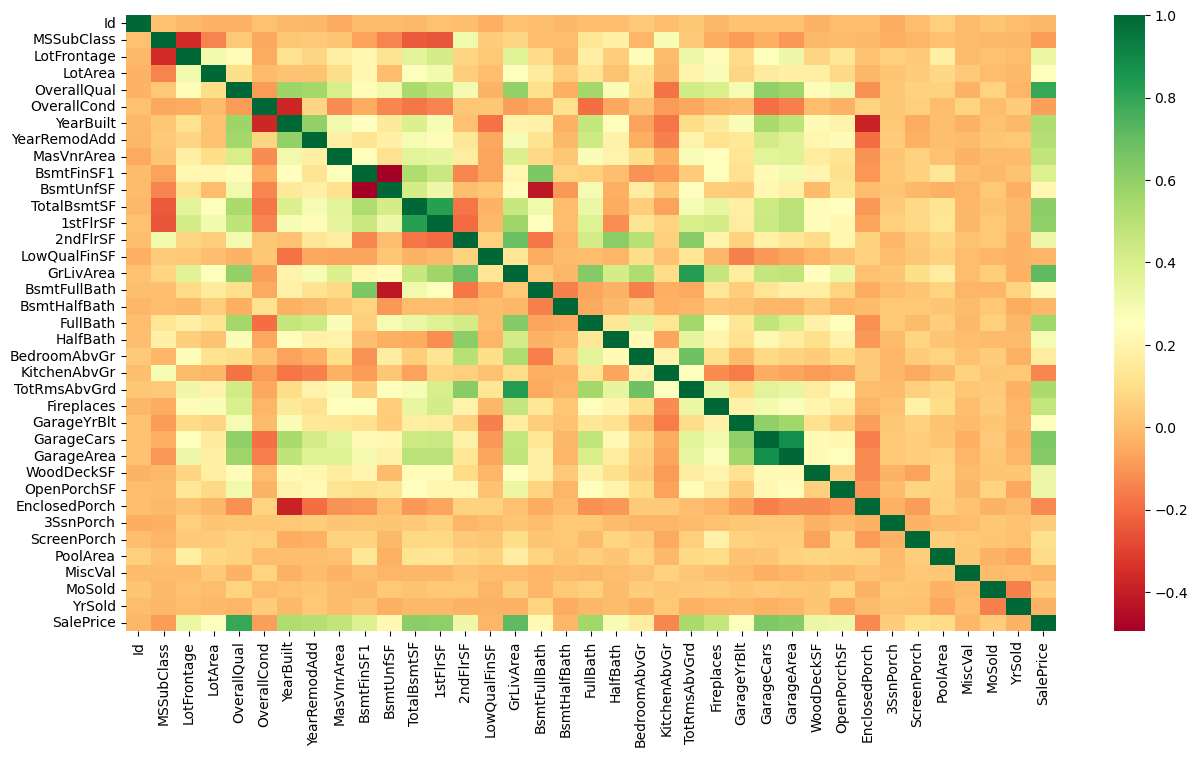

In [10]:
#criando um heatmap
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(treino.corr(),cmap='RdYlGn')

plt.show()

In [11]:
col_obj = treino.columns[treino.dtypes == 'object']
col_obj

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
treino[col_obj]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,-1,-1,-1,WD,Normal
1,RL,Pave,-1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,-1,-1,-1,WD,Normal
2,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,-1,-1,-1,WD,Normal
3,RL,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml
4,RL,Pave,-1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,-1,-1,-1,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,-1,-1,-1,WD,Normal
1456,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,-1,MnPrv,-1,WD,Normal
1457,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,-1,GdPrv,Shed,WD,Normal
1458,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,-1,-1,-1,WD,Normal


In [13]:
#visualizando as casas mais caras
mais_caras = treino.sort_values('SalePrice').tail(10)
mais_caras = mais_caras[col_obj]
mais_caras.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
769,RL,Pave,-1,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
440,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
1046,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
803,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,RFn,TA,TA,Y,-1,-1,-1,New,Partial
898,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
1169,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
1182,RL,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,-1,WD,Abnorml
691,RL,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal


In [14]:
#visualizando as mais baratas
mais_baratas = treino.sort_values('SalePrice').head(10)
mais_baratas = mais_baratas[col_obj]
mais_baratas.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml
968,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,-1,-1,-1,-1,Y,-1,GdWo,-1,WD,Abnorml
533,RL,Pave,-1,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
30,C (all),Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,...,Detchd,Unf,TA,Fa,N,-1,MnPrv,-1,WD,Normal
710,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
1337,RM,Pave,Grvl,IR1,Bnk,AllPub,Corner,Mod,OldTown,Feedr,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
705,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,-1,Othr,WD,Normal
1325,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,MnPrv,-1,WD,Normal
812,C (all),Grvl,-1,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,...,Basment,Unf,TA,TA,N,-1,-1,Shed,WD,Alloca


In [15]:
#visualizando quais valores que se repetem entre as mais caras
caras_rep = mais_caras.nunique()
caras_rep.head(3)

MSZoning    1
Street      1
Alley       1
dtype: int64

In [16]:
#visualizando quais valores que se repetem entre as mais baratas
baratas_rep = mais_baratas.nunique()
baratas_rep.head(3)

MSZoning    3
Street      2
Alley       3
dtype: int64

In [17]:
#unindo essas informações
rep = pd.concat([caras_rep,baratas_rep],axis = 1).sort_values([0,1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [18]:
mais_caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [19]:
mais_baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


In [20]:
treino.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [21]:
teste.Utilities.value_counts()

AllPub    1459
Name: Utilities, dtype: int64

In [22]:
#eliminando essa coluna nas duas bases, pois não trazem informação relevante
treino = treino.drop('Utilities',axis = 1)
teste = teste.drop('Utilities',axis = 1)

##### Verificando a coluna CentralAir

In [23]:
treino.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

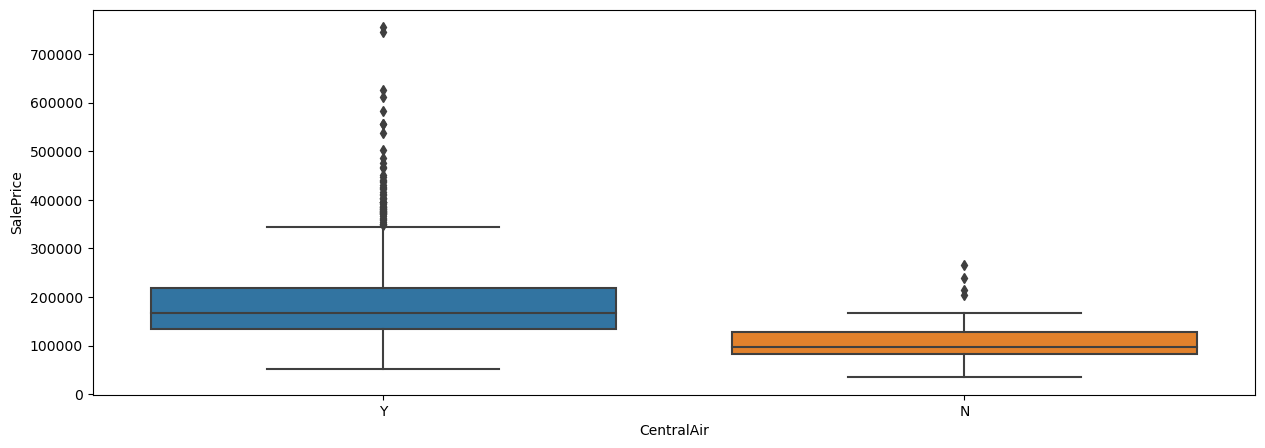

In [24]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x= treino.CentralAir,y=treino.SalePrice)


plt.show()

#### A presença de ar condicionado central é uma grande influência para o preço das casas

In [25]:
#transformando a coluna em Y = 1 e N = 0
treino['CentralAirCheck'] = treino['CentralAir']
treino['CentralAir'] = treino.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [26]:
treino[['CentralAirCheck','CentralAir']].value_counts()

CentralAirCheck  CentralAir
Y                1             1365
N                0               95
dtype: int64

In [27]:
treino = treino.drop('CentralAirCheck',axis = 1)

In [28]:
teste['CentralAirCheck'] = teste['CentralAir']
teste['CentralAir'] = teste.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [29]:
teste = teste.drop('CentralAirCheck',axis = 1)

##### Paved drive - calçada pavimentada

In [30]:
#verificando valores
treino.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [31]:
#coluna a ser analisada
coluna = 'PavedDrive'

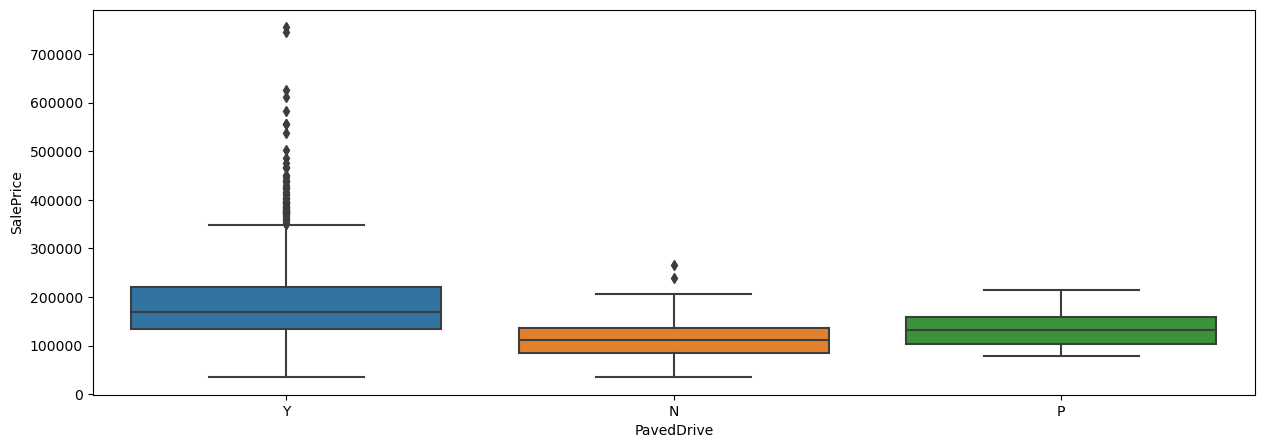

In [32]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x= treino[coluna],y=treino.SalePrice)
plt.show()

##### Criando função para transformar valores de texto em números

In [33]:
def DefinePavedDrive(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5
    else:
        return -1

In [34]:
treino['PavedDriveCheck'] = treino['PavedDrive']
treino['PavedDrive'] = treino.PavedDrive.apply(DefinePavedDrive)

In [35]:
treino[['PavedDriveCheck','PavedDrive']].value_counts()

PavedDriveCheck  PavedDrive
Y                1.0           1340
N                0.0             90
P                0.5             30
dtype: int64

In [36]:
treino = treino.drop('PavedDriveCheck',axis = 1)

In [37]:
teste['PavedDrive'] = teste.PavedDrive.apply(DefinePavedDrive)

#### Coluna MSZoning

In [38]:
treino.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [39]:
treino.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [40]:
treino.groupby('MSZoning')['SalePrice'].agg(['mean','min','max','median','count'])

,mean,min,max,median,count
MSZoning,,,,,
C (all),74528.000000,34900,133900,74700.0,10
FV,214014.061538,144152,370878,205950.0,65
RH,131558.375000,76000,200000,136500.0,16
RL,191004.994787,39300,755000,174000.0,1151
RM,126316.830275,37900,475000,120500.0,218


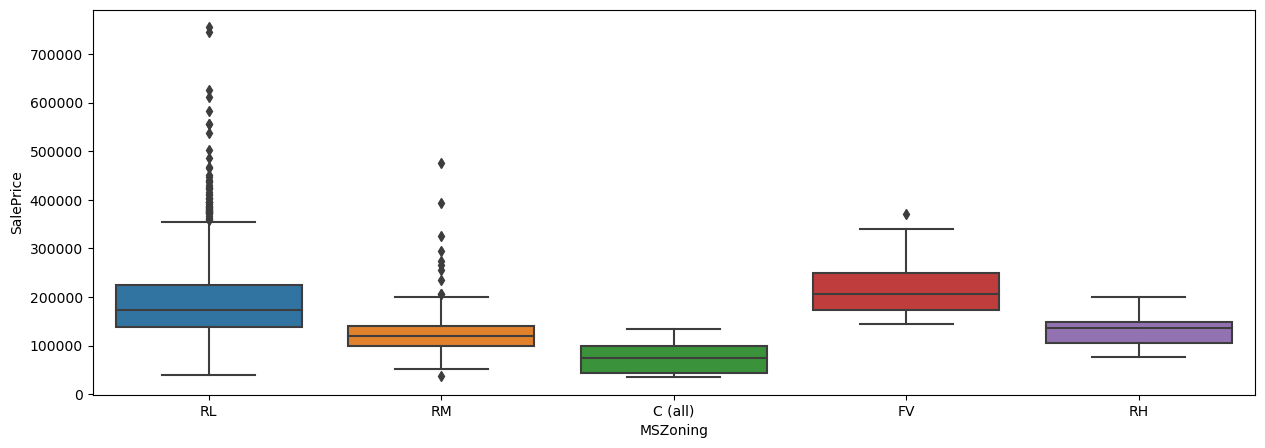

In [41]:
fig,ax = plt.subplots(figsize=(15,5))
coluna = 'MSZoning'

sns.boxplot(x= treino[coluna],y=treino.SalePrice)

plt.show()

#### Usando o OneHotEncoder para usar dados para transformar os valores textuais em novas colunas

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')

In [44]:
ohe_MSZoning = ohe_MSZoning.fit(treino[['MSZoning']])

In [45]:
ohe_MSZoning.transform(treino[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [46]:
#transformando em DataFrame
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(treino[['MSZoning']]).toarray(),
                               columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [47]:
treino = pd.concat([treino, ohe_MSZoning_df], axis = 1)

In [48]:
treino.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,Corner,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,FR2,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0


In [49]:
treino = treino.drop('MSZoning', axis = 1)

In [50]:
ohe_MSZoning.transform(teste[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(teste[['MSZoning']]).toarray(),
                               columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [52]:
teste = pd.concat([teste, ohe_MSZoning_df], axis = 1)

In [53]:
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,RH,65.0,11622,Pave,-1,Reg,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0
1,1462,20,RL,80.0,14267,Pave,-1,IR1,Lvl,Corner,...,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
2,1463,60,RL,68.0,13830,Pave,-1,IR1,Lvl,Inside,...,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0


In [54]:
teste = teste.drop('MSZoning',axis = 1)

In [55]:
#analisando a coluna GarageQual
treino.GarageQual.value_counts()

TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

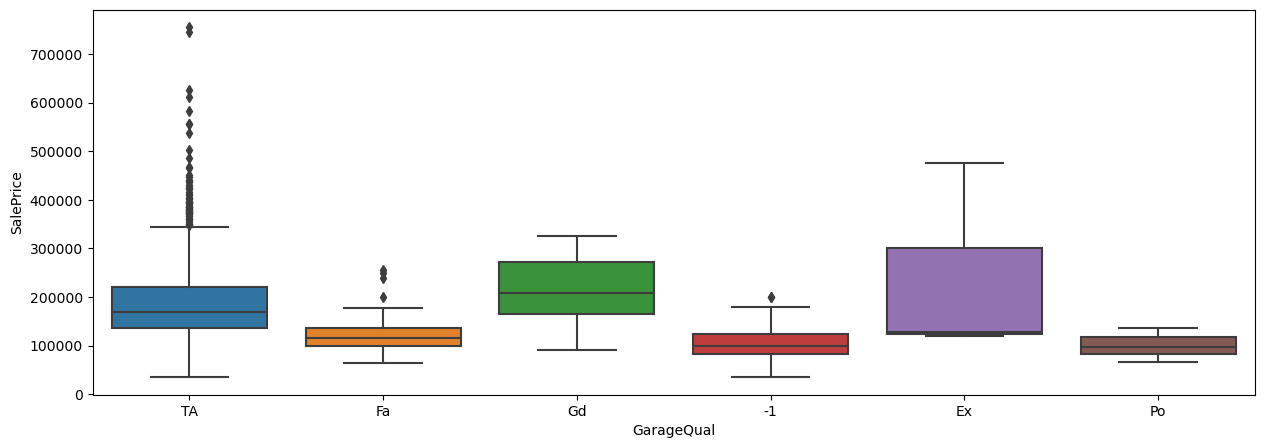

In [56]:
fig,ax = plt.subplots(figsize=(15,5))
coluna = 'GarageQual'

sns.boxplot(x= treino[coluna],y=treino.SalePrice)

plt.show()

In [57]:
col_garagem = treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [58]:
treino[col_garagem].head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [59]:
treino[['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
dtype: int64

#### Se mantivermos essas duas colunas, o modelo pode não ficar tão bom já que duas colunas muito semelhantes estarão sendo utilizadas no modelo

In [60]:
#vendo onde são iguais
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

In [61]:
#apagando GarageCond
treino = treino.drop('GarageCond',axis = 1)

#### Relação entre 'GarageCars' e 'GarageArea'

In [62]:
treino[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [63]:
# eliminando a coluna GarageArea
treino = treino.drop('GarageArea',axis = 1)

In [64]:
col_garagem = treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

In [65]:
treino[['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.272009,0.146341,0.261354
YearBuilt,0.272009,1.000000,0.592855,0.522897
YearRemodAdd,0.146341,0.592855,1.000000,0.507101
SalePrice,0.261354,0.522897,0.507101,1.000000


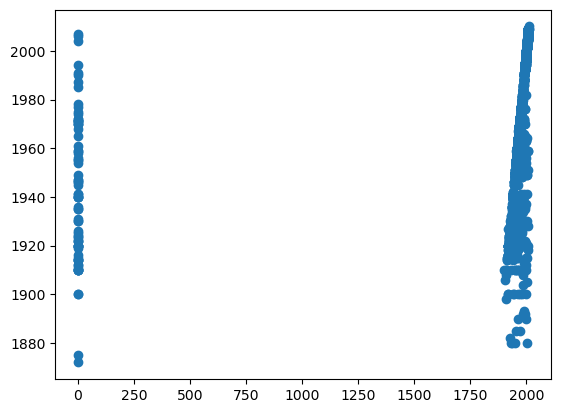

In [66]:
fig,ax = plt.subplots()


ax.scatter(treino.GarageYrBlt,treino.YearBuilt)


plt.show()

In [67]:
treino.loc[treino.GarageYrBlt != -1 ,['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


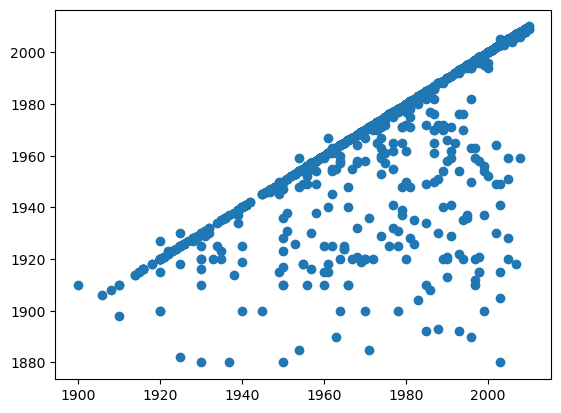

In [68]:
# visualizando a correlação entre GarageYrBlt e YearBuilt
fig,ax = plt.subplots()


ax.scatter(treino.loc[treino.GarageYrBlt != -1,'GarageYrBlt'],treino.loc[treino.GarageYrBlt != -1,'YearBuilt'])


plt.show()

In [69]:
treino = treino.drop('GarageYrBlt', axis = 1)

In [70]:
treino.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [71]:
!pip install --upgrade scikit-learn


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\carol\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.1/9.2 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.2 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.2 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/9.2 MB 4.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.2 MB 4.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.2 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.2 MB 5.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.2 MB 5.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.3/9.2 MB 5.8 MB/s eta 0:00:02
   ----------- -------------

In [72]:
ohe_GarageType =  OneHotEncoder(handle_unknown='ignore', min_frequency= 25)

In [73]:
ohe_GarageType = ohe_GarageType.fit(treino[['GarageType']])

In [74]:
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(treino[['GarageType']]).toarray(),columns = ohe_GarageType.get_feature_names_out())
ohe_GarageType_df.head(3)

,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [75]:
treino = pd.concat([treino,ohe_GarageType_df], axis = 1)

In [76]:
treino = treino.drop('GarageType', axis = 1)

#### Para as próximas colunas a serem trabalhadas, vamos utilizar o OrdinalEncoder pois estas colunas tem variáveis em que a ordem importa

In [77]:
#criando a lista ordinal
GarageFinish_oe = ['Unf','Rfn','Fin']
GarageQual_oe = ['Po','Fa', 'TA','Gd','Ex']

In [78]:
#importando OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [79]:
#criando o encoder
oe_garage = OrdinalEncoder(categories=[GarageFinish_oe,GarageQual_oe],
                    handle_unknown='use_encoded_value',
                    unknown_value= -1)

In [80]:
oe_garage = oe_garage.fit(treino[['GarageFinish','GarageQual']])

In [81]:
oe_garage.transform(treino[['GarageFinish','GarageQual']])

array([[-1.,  2.],
       [-1.,  2.],
       [-1.,  2.],
       ...,
       [-1.,  2.],
       [ 0.,  2.],
       [ 2.,  2.]])

In [82]:
#fazendo o mesmo para a base de teste
teste = teste.drop('GarageCond', axis = 1)

In [83]:
teste = teste.drop('GarageArea', axis = 1)

In [84]:
teste = teste.drop('GarageYrBlt', axis = 1)

In [85]:
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(teste[['GarageType']]).toarray(),columns = ohe_GarageType.get_feature_names_out())
teste = pd.concat([teste,ohe_GarageType_df], axis = 1)
teste = teste.drop('GarageType', axis = 1)

In [86]:
teste[['GarageFinish','GarageQual']] = oe_garage.transform(teste[['GarageFinish','GarageQual']])

In [87]:
treino.to_csv('train_3.csv')
teste.to_csv('test_3.csv')